Tests audio operations to build the AudioProcessor class.

In [22]:
import os
import time

import torch
import numpy as np
import librosa as libr
import matplotlib.pyplot as plt

import cheapfake.contrib.video_processor as video_processor

In [17]:
# Michael's code.
class STFT:
    '''
    Short-time Fourier transform (STFT) for librosa dataset
    Args: 
    phase: If true, will return the magnitude and phase of the transformation, 
    if false only returns magnitude
    Returns:
    torch.float tensor
    '''

    def __init__(self, phase=False):
        self.phase = phase

    def __call__(self, y):
        dims = y.shape
        y = libr.core.stft(np.reshape(y, (dims[0],)))
        y, phase = np.abs(y), np.angle(y)
        y = torch.from_numpy(y).permute(1, 0)
        phase = torch.from_numpy(phase).permute(1, 0)
        if self.phase:
            return torch.cat((y, phase), dim=0).float()
        else:
            return y.float()

In [18]:
# Michael's code.
class ToMFCC:
    '''
    Transformation to convert soundfile loaded via LibriSpeechDataset to Mel-
    frequency cepstral coefficients (MFCCs)
    Args: 
    number_of_mels: Number of bins to use for cepstral coefficients
    Returns:
    torch.float tensor
    '''

    def __init__(self, number_of_mels=128):
        self.number_of_mels = number_of_mels

    def __call__(self, y):
        dims = y.shape
        y = libr.feature.melspectrogram(np.reshape(y, (dims[1],)), 16000,
                                        n_mels=self.number_of_mels, fmax=8000)
        y = libr.feature.mfcc(S=libr.power_to_db(y))
        y = torch.from_numpy(y)
        return y.float()

In [19]:
# Load the audio and then pass it through to STFT and see what you get.
video_path = "/home/shu/shu/Datasets/DFDC_small_subset/aagfhgtpmv/video/aagfhgtpmv.mp4"
videofileprocessor = video_processor.VideoFileProcessor(verbose=False)
audio_signal = videofileprocessor._extract_all_audio(video_path=video_path)

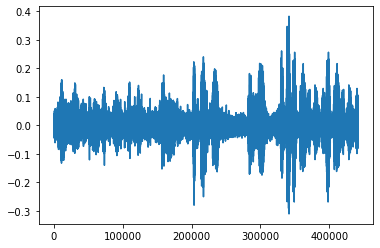

In [20]:
# Plot the audio signal.
plt.figure()
plt.plot(audio_signal)
plt.show()

(864, 1025)


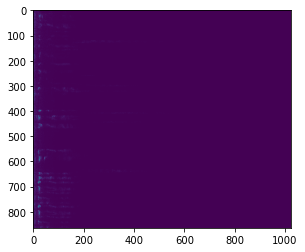

In [27]:
stft = STFT(phase=False)
audio_spectrogram = stft(audio_signal).numpy()

print(audio_spectrogram.shape)

plt.figure()
plt.imshow(audio_spectrogram)
plt.show()

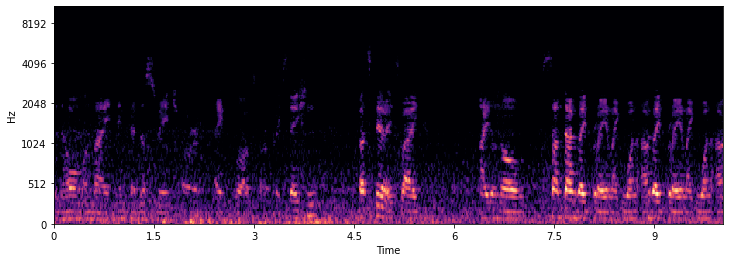

torch.Size([128, 864])


In [41]:
import librosa.display

spectrogram = libr.feature.melspectrogram(y=audio_signal, sr=44100)
log_spectrogram = libr.amplitude_to_db(spectrogram, ref=np.max)
#log_spectrogram = torch.from_numpy(log_spectrogram)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_spectrogram, sr=44100, x_axis="time", y_axis="mel")
plt.show()

log_spectrogram = torch.from_numpy(log_spectrogram)
print(log_spectrogram.shape)